# TAREA 2:



1.- Hacer un modelo regresión logistica con woes con la tabla que generaron en la tarea 1.

2.- Hacer un árbol de clasificación con la misma tabla que el problema 1. No olviden que tienen que hacer el ajuste de hiperparámetros.

3.- Seleccionar con validación cruzada cuál es el mejor modelo de los dos problemas anteriores.

4.- Obtener los puntos óptimos de decisión para el modelo seleccionado.

En todos los casos obtener: Gini, KS, ROC en entrenamiento y validación.
Fecha de entrega: Viernes 7 de enero.


## 1.- Modelo de Regresión Logística con Woes

In [1]:
# Importamos las herramientas que utilizaremos

# Para la regresion logística importamos 
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from pylab import*
import seaborn as sns

# Para los arboles y la validación cruzada importamos 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
import numpy as np

In [2]:
# Mandamos a llamar a la base que analizamos en la Tarea 1 esta es la que decidimos que tiene los 
# criterios necesarios y a la que se le hará la regresión. 

ruta = "C:/Users/cresp/Documents/GitHub/Seminario_9273/Tarea 2/"
base = "Base_clientes.csv"
bd = pd.read_csv(ruta+base)

In [3]:
bd.head()

,Unnamed: 0,num_caso,edad_credit,retrasos_max,comp_interno1,Otorgar
0,0,1,62.0,1.0,3039.513678,1.0
1,1,7,29.0,6.0,1547.112462,1.0
2,2,8,63.0,1.0,1215.805471,1.0
3,3,9,15.0,0.0,0.000000,1.0
4,4,10,16.0,1.0,0.000000,1.0


El proposito de agregar la columna "Otorgar" es el de servir como variable de respuesta, necesitamos esta variable de respuesta para empezar a contruir el modelo de regresión logistica 

In [4]:
bd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     50000 non-null  int64  
 1   num_caso       50000 non-null  int64  
 2   edad_credit    50000 non-null  float64
 3   retrasos_max   50000 non-null  float64
 4   comp_interno1  50000 non-null  float64
 5   Otorgar        50000 non-null  float64
dtypes: float64(4), int64(2)
memory usage: 2.3 MB


In [5]:
# Esta librería requiere tener instalada una version reciente de jupyter y visual studio 
from optbinning import OptimalBinning

In [6]:
# Los datos se dividen en train y test
train, test = train_test_split(bd, test_size = 0.30, random_state = 100) 

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35000 entries, 48824 to 38408
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     35000 non-null  int64  
 1   num_caso       35000 non-null  int64  
 2   edad_credit    35000 non-null  float64
 3   retrasos_max   35000 non-null  float64
 4   comp_interno1  35000 non-null  float64
 5   Otorgar        35000 non-null  float64
dtypes: float64(4), int64(2)
memory usage: 1.9 MB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 4253 to 25776
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     15000 non-null  int64  
 1   num_caso       15000 non-null  int64  
 2   edad_credit    15000 non-null  float64
 3   retrasos_max   15000 non-null  float64
 4   comp_interno1  15000 non-null  float64
 5   Otorgar        15000 non-null  float64
dtypes: float64(4), int64(2)
memory usage: 820.3 KB


In [9]:
y = train.Otorgar

In [10]:
columnas = list(bd.columns.values)
print(columnas)

['Unnamed: 0', 'num_caso', 'edad_credit', 'retrasos_max', 'comp_interno1', 'Otorgar']


In [11]:
#columnas.remove("Otorgar")

In [12]:
columnas

['Unnamed: 0',
 'num_caso',
 'edad_credit',
 'retrasos_max',
 'comp_interno1',
 'Otorgar']

In [13]:
bd.head()

,Unnamed: 0,num_caso,edad_credit,retrasos_max,comp_interno1,Otorgar
0,0,1,62.0,1.0,3039.513678,1.0
1,1,7,29.0,6.0,1547.112462,1.0
2,2,8,63.0,1.0,1215.805471,1.0
3,3,9,15.0,0.0,0.000000,1.0
4,4,10,16.0,1.0,0.000000,1.0


In [14]:
train.head()

,Unnamed: 0,num_caso,edad_credit,retrasos_max,comp_interno1,Otorgar
48824,48824,97564,2.0,0.0,0.000000,1.0
2704,2704,5448,5.0,0.0,0.000000,1.0
25631,25631,50932,34.0,1.0,0.000000,1.0
7285,7285,14569,51.0,1.0,354.609929,1.0
27346,27346,54236,31.0,1.0,506.585613,1.0


In [15]:
optb_num_caso = OptimalBinning(name="num_caso", dtype="numerical", solver="cp")
optb_edad_credit = OptimalBinning(name="edad_credit", dtype="categorical", solver="cp",)
optb_retrasos_max = OptimalBinning(name="retrasos_max", dtype="numerical", solver="cp")
optb_comp_interno1 = OptimalBinning(name="comp_interno1", dtype="numerical", solver="cp")

In [16]:
optb_num_caso.fit(train["num_caso"].values, y)
optb_edad_credit.fit(train["edad_credit"].values, y)
optb_retrasos_max.fit(train["retrasos_max"].values, y)
optb_comp_interno1.fit(train["comp_interno1"].values, y)

OptimalBinning(name='comp_interno1')

A continuación se muestran las cotas superiores e inferiores de cada categoría o columna en las cuales podemos apreciar los rangos de cada una. 

In [17]:
display(optb_num_caso.splits)
display(optb_edad_credit.splits)
display(optb_retrasos_max.splits)
display(optb_comp_interno1.splits)

array([55386.5, 66023.5, 72151.5, 78853.5, 84238. , 89131. , 94018. ])

[array([ 0., 12., 25., 14.]),
 array([13., 17., 15., 16.]),
 array([19., 23., 20.]),
 array([22., 24., 18., 26.]),
 array([11., 10., 21.]),
 array([ 9.,  3.,  8., 40., 28.,  5.]),
 array([ 6., 47., 48., 49., 50., 51., 52., 53., 54., 57., 56., 58., 59.,
        63., 62., 61., 46., 60., 55., 45., 32., 43.,  1.,  2.,  4.,  7.,
        27., 29., 30., 31., 44., 64., 34., 35., 36., 37., 38., 39., 41.,
        42., 33., 65.])]

array([0.5])

array([1265.4508667 , 1963.01922607, 2710.23303223])

In [18]:
num_caso_table = optb_num_caso.binning_table
edad_credit_table = optb_edad_credit.binning_table
retrasos_max_table = optb_retrasos_max.binning_table
comp_interno1_table = optb_comp_interno1.binning_table

Ahora procedemos a mostrar las tablas que se crean de aplicar la construcción, estas tablas resultan de gran ayuda ya que con ellas calculamos los WoE's

In [19]:
display(num_caso_table.build())
display(edad_credit_table.build())
display(retrasos_max_table.build())
display(comp_interno1_table.build())

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 55386.50)",19589,0.559686,287,19302,0.985349,-0.374778,0.065998,0.008202
1,"[55386.50, 66023.50)",3744,0.106971,48,3696,0.987179,-0.510101,0.021989,0.002719
2,"[66023.50, 72151.50)",2220,0.063429,25,2195,0.988739,-0.641358,0.019454,0.002391
3,"[72151.50, 78853.50)",2285,0.065286,22,2263,0.990372,-0.7997,0.029082,0.003541
4,"[78853.50, 84238.00)",1909,0.054543,6,1903,0.996857,-1.925723,0.091376,0.009931
5,"[84238.00, 89131.00)",1750,0.050000,18,1732,0.989714,-0.732956,0.019251,0.002354
6,"[89131.00, 94018.00)",1750,0.050000,50,1700,0.971429,0.307343,0.005487,0.000683
7,"[94018.00, inf)",1753,0.050086,285,1468,0.837422,2.194537,0.750017,0.078554
8,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
9,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"[0.0, 12.0, 25.0, 14.0]",2287,0.065343,484,1803,0.788369,2.518582,1.512516,0.150990
1,"[13.0, 17.0, 15.0, 16.0]",2744,0.078400,101,2643,0.963192,0.569155,0.033668,0.004153
2,"[19.0, 23.0, 20.0]",1895,0.054143,50,1845,0.973615,0.225492,0.003072,0.000383
3,"[22.0, 24.0, 18.0, 26.0]",2549,0.072829,57,2492,0.977638,0.055914,0.000234,0.000029
4,"[11.0, 10.0, 21.0]",1937,0.055343,38,1899,0.980382,-0.077793,0.000323,0.000040
5,"[9.0, 3.0, 8.0, 40.0, 28.0, 5.0]",3637,0.103914,10,3627,0.997250,-2.059872,0.190280,0.020309
6,"[6.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0...",19951,0.570029,1,19950,0.999950,-6.06728,3.524964,0.197518
7,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
8,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,35000,1.000000,741,34259,0.978829,,5.265057,0.373422


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.50)",7416,0.211886,404,7012,0.945523,0.979741,0.333634,0.040112
1,"[0.50, inf)",27584,0.788114,337,27247,0.987783,-0.558912,0.190328,0.023486
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,35000,1.000000,741,34259,0.978829,,0.523962,0.063599


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 1265.45)",28109,0.803114,630,27479,0.977587,0.058246,0.002802,0.000350
1,"[1265.45, 1963.02)",1961,0.056029,51,1910,0.973993,0.210671,0.002754,0.000344
2,"[1963.02, 2710.23)",1776,0.050743,59,1717,0.966779,0.462908,0.013658,0.001692
3,"[2710.23, inf)",3154,0.090114,1,3153,0.999683,-4.222406,0.382908,0.028836
4,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
5,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,35000,1.000000,741,34259,0.978829,,0.402121,0.031222


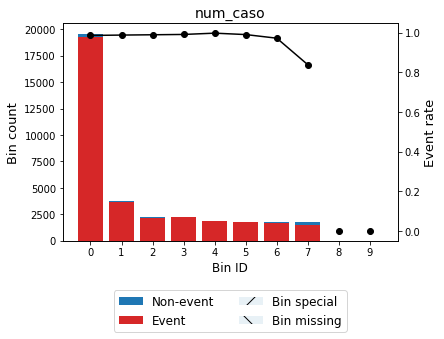

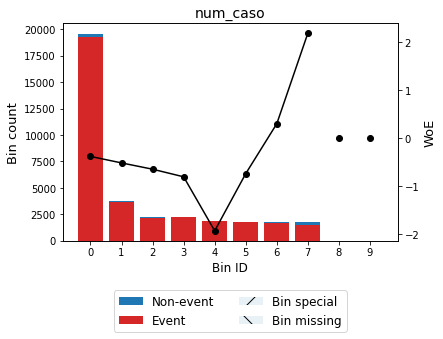

In [20]:
num_caso_table.plot(metric="event_rate")
num_caso_table.plot(metric="woe")

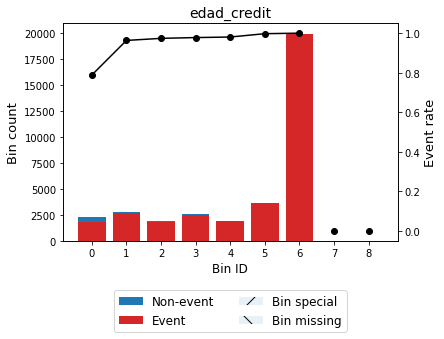

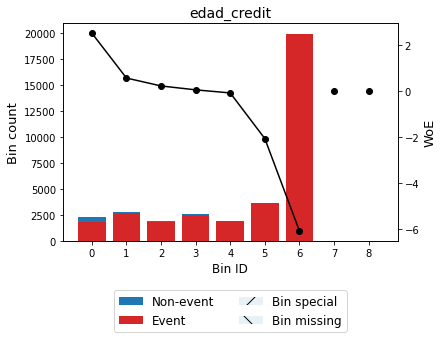

In [21]:
edad_credit_table.plot(metric="event_rate")
edad_credit_table.plot(metric="woe")

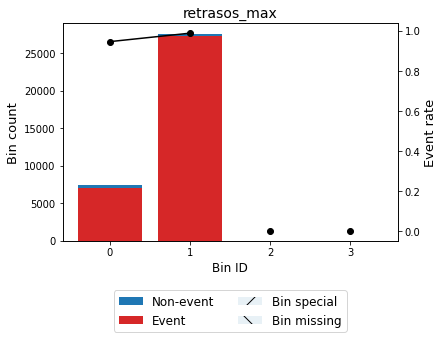

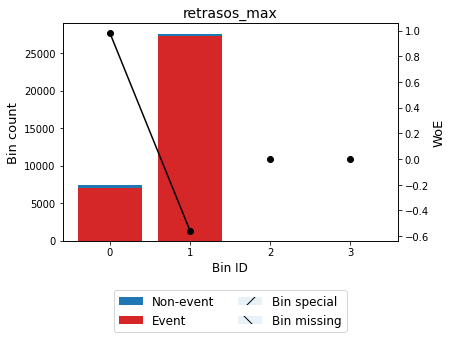

In [22]:
retrasos_max_table.plot(metric="event_rate")
retrasos_max_table.plot(metric="woe")

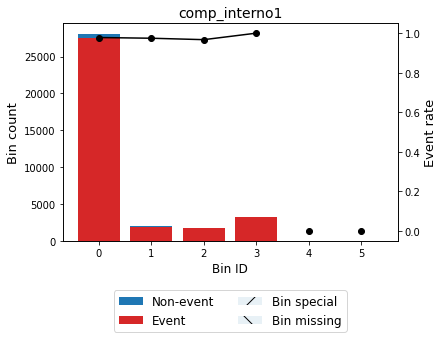

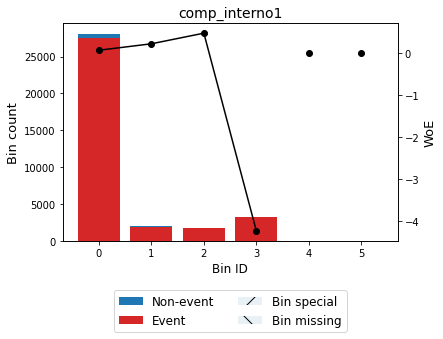

In [23]:
comp_interno1_table.plot(metric="event_rate")
comp_interno1_table.plot(metric="woe")

In [24]:
#Transformamos las variables a woe

train["woe_num_caso"] = optb_num_caso.transform(train["num_caso"], metric="woe")
train["woe_edad_credit"] = optb_edad_credit.transform(train["edad_credit"], metric="woe")
train["woe_retrasos_max"] = optb_retrasos_max.transform(train["retrasos_max"], metric="woe")
train["woe_comp_interno1"] = optb_comp_interno1.transform(train["comp_interno1"], metric="woe")

In [25]:
train.head()

,Unnamed: 0,num_caso,edad_credit,retrasos_max,comp_interno1,Otorgar,woe_num_caso,woe_edad_credit,woe_retrasos_max,woe_comp_interno1
48824,48824,97564,2.0,0.0,0.000000,1.0,2.194537,-6.067280,0.979741,0.058246
2704,2704,5448,5.0,0.0,0.000000,1.0,-0.374778,-2.059872,0.979741,0.058246
25631,25631,50932,34.0,1.0,0.000000,1.0,-0.374778,-6.067280,-0.558912,0.058246
7285,7285,14569,51.0,1.0,354.609929,1.0,-0.374778,-6.067280,-0.558912,0.058246
27346,27346,54236,31.0,1.0,506.585613,1.0,-0.374778,-6.067280,-0.558912,0.058246


In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35000 entries, 48824 to 38408
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         35000 non-null  int64  
 1   num_caso           35000 non-null  int64  
 2   edad_credit        35000 non-null  float64
 3   retrasos_max       35000 non-null  float64
 4   comp_interno1      35000 non-null  float64
 5   Otorgar            35000 non-null  float64
 6   woe_num_caso       35000 non-null  float64
 7   woe_edad_credit    35000 non-null  float64
 8   woe_retrasos_max   35000 non-null  float64
 9   woe_comp_interno1  35000 non-null  float64
dtypes: float64(8), int64(2)
memory usage: 2.9 MB


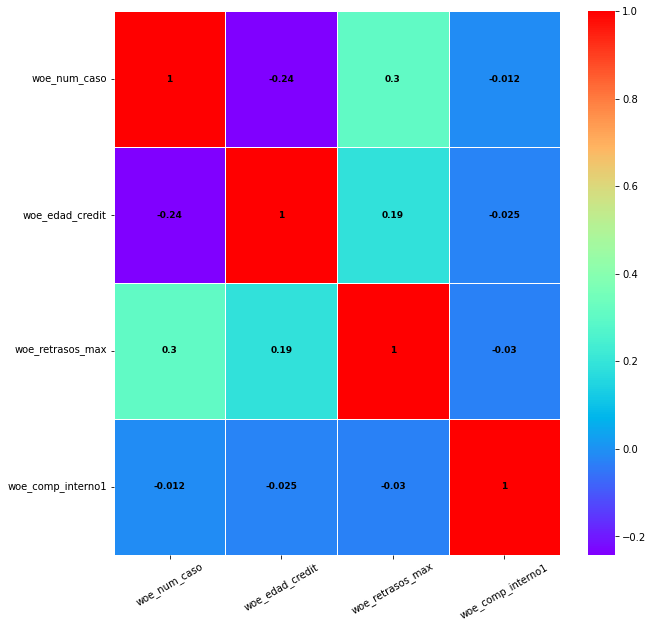

In [27]:
corr = train.iloc[:,6:].corr()


xticks = list(corr.index)  
yticks = list(corr.index)  
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(1, 1, 1)

sns.heatmap(corr,annot=True,cmap="rainbow",ax=ax1,linewidths=.5,annot_kws={'size':9,'weight':'bold', 'color':'k'})
ax1.set_xticklabels(xticks, rotation=30, fontsize=10)
ax1.set_yticklabels(yticks, rotation=0, fontsize=10)
plt.show()

In [28]:
#train=train[["Otorgar","woe_num_caso","woe_edad_credit","woe_retrasos_max","woe_comp_interno1"]]

In [29]:
X_woe_train=train.iloc[:,6:9]
y_train=train.iloc[:,5]
X_woe_train.head()

,woe_num_caso,woe_edad_credit,woe_retrasos_max
48824,2.194537,-6.067280,0.979741
2704,-0.374778,-2.059872,0.979741
25631,-0.374778,-6.067280,-0.558912
7285,-0.374778,-6.067280,-0.558912
27346,-0.374778,-6.067280,-0.558912


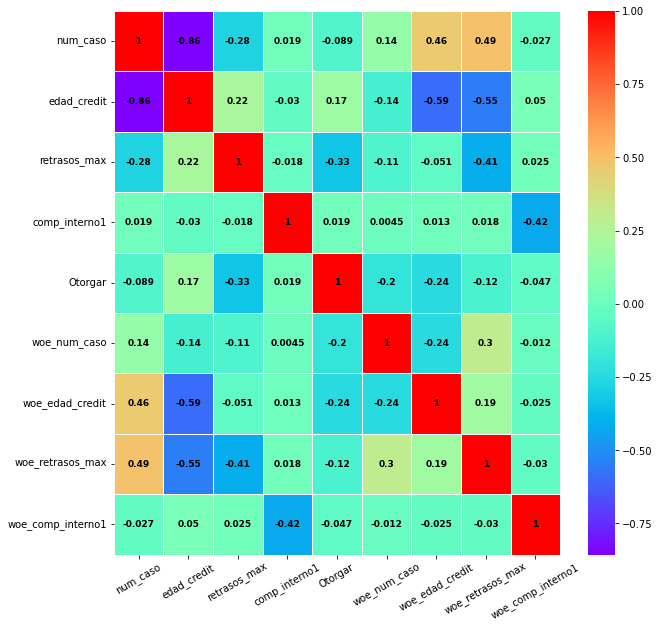

In [30]:
corr = train.iloc[:,1:].corr()
corr

xticks = list(corr.index)  
yticks = list(corr.index)  
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(1, 1, 1)

sns.heatmap(corr,annot=True,cmap="rainbow",ax=ax1,linewidths=.5,annot_kws={'size':9,'weight':'bold', 'color':'k'})
ax1.set_xticklabels(xticks, rotation=30, fontsize=10)
ax1.set_yticklabels(yticks, rotation=0, fontsize=10)
plt.show()

Ahora se tiene que sacar el modelo logístico con las covariables y con ello podemos graficar la curva ROC para ello tenemos el método de LogisticRegression()

In [31]:
model=LogisticRegression()
clf=model.fit(X_woe_train,y_train)

y_pred
 [1. 1. 1. ... 1. 1. 1.]
y_pred1
 [6.53243029 6.0764535  9.70911157 ... 9.9527668  9.70911157 3.85544286]


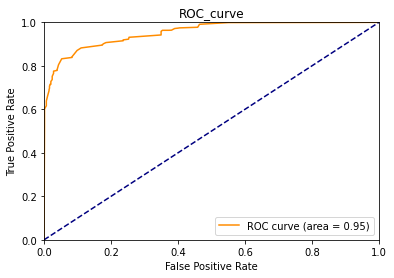

In [32]:

y_pred=clf.predict(X_woe_train)
y_pred1=clf.decision_function(X_woe_train)
print('y_pred\n',y_pred)
print('y_pred1\n',y_pred1)

#Draw ROC curve and calculate AUC value
fpr,tpr,threshold = roc_curve(y_train, y_pred1)
roc_auc = auc(fpr,tpr)
plot(fpr,tpr,color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_curve')
plt.legend(loc="lower right")
plt.show()

In [33]:
coe=model.coef_
coe[0]

array([-1.33122519, -0.96728682,  0.15835626])

In [34]:
f_train=train[["Otorgar","woe_num_caso","woe_edad_credit","woe_retrasos_max","woe_comp_interno1"]]
X_woe_train=f_train.iloc[:,1:]
y_train=f_train.iloc[:,0]
X_woe_train.head()
model=LogisticRegression()
clf=model.fit(X_woe_train,y_train)

In [35]:
coe=model.coef_
coe[0]


array([-1.46902765, -1.02710383,  0.13978324, -1.24790023])

(array([3.1400e+02, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 5.5000e+01, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 3.3000e+02, 6.1000e+02,
        4.9000e+01, 6.4000e+01, 2.9200e+02, 1.2300e+02, 0.0000e+00,
        6.0000e+01, 0.0000e+00, 5.7100e+02, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 4.3600e+02, 0.0000e+00, 5.6200e+02, 7.2500e+02,
        1.9490e+03, 1.9890e+03, 1.0980e+03, 8.1200e+02, 4.4400e+02,
        7.9000e+01, 7.3000e+01, 1.0000e+01, 1.0700e+02, 0.0000e+00,
        3.4300e+02, 2.5200e+02, 0.0000e+00, 1.4000e+02, 0.0000e+00,
        7.8500e+02, 1.0570e+03, 4.3300e+02, 6.3100e+02, 3.2000e+01,
        1.3760e+03, 2.2000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+01, 2.4000e+01, 0.0000e+00, 0.00

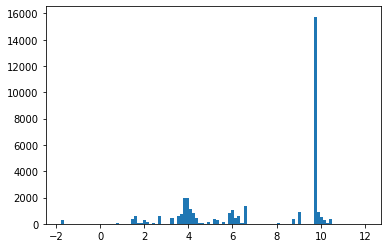

In [36]:
hist(y_pred1,bins=100)

In [37]:
train.to_csv("bd_train.csv",index=None) 

In [38]:
coe[0][0]

-1.4690276513133549

In [39]:
coe[0][1]

-1.0271038290125951

In [40]:
coe[0][2]

0.1397832429322228

## Árbol de clasificación

In [41]:
from sklearn.model_selection import (GridSearchCV, cross_val_score,
                                                 RandomizedSearchCV,
                                                 cross_validate,
                                                 StratifiedKFold)

Esta función se vio en calse y tiene como utilidad sacar la matriz de confusión y la curva roc 

In [42]:
def performance_evaluation_report(model, X_test, y_test, show_plot=False, labels=None, show_pr_curve=False):
    '''
    Function for creating a performance report of a classification model.
    
    Parameters
    ----------
    model : scikit-learn estimator
        A fitted estimator for classification problems.
    X_test : pd.DataFrame
        DataFrame with features matching y_test
    y_test : array/pd.Series
        Target of a classification problem.
    show_plot : bool
        Flag whether to show the plot
    labels : list
        List with the class names.
    show_pr_curve : bool
        Flag whether to also show the PR-curve. For this to take effect, 
        show_plot must be True.
        
    Return
    ------
    stats : pd.Series
        A series with the most important evaluation metrics
    '''

    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]

    cm = metrics.confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()

    fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_prob)
    roc_auc = metrics.auc(fpr, tpr)

    precision, recall, thresholds = metrics.precision_recall_curve(
        y_test, y_pred_prob)
    pr_auc = metrics.auc(recall, precision)

    if show_plot:

        if labels is None:
            labels = ['Negative', 'Positive']

        N_SUBPLOTS = 3 if show_pr_curve else 2
        PLOT_WIDTH = 15 if show_pr_curve else 12
        PLOT_HEIGHT = 5 if show_pr_curve else 6

        fig, ax = plt.subplots(
            1, N_SUBPLOTS, figsize=(PLOT_WIDTH, PLOT_HEIGHT))
        fig.suptitle('Performance Evaluation', fontsize=16)

        sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, cmap='BuGn_r', square=True, cbar=False, ax=ax[0],
                    annot_kws={"ha": 'center', "va": 'center'})
        ax[0].set(xlabel='Predicted label',
                  ylabel='Actual label', title='Confusion Matrix')
        ax[0].xaxis.set_ticklabels(labels)
        ax[0].yaxis.set_ticklabels(labels)

        ax[1].plot(fpr, tpr, 'b-', label=f'ROC-AUC = {roc_auc:.2f}')
        ax[1].set(xlabel='False Positive Rate',
                  ylabel='True Positive Rate', title='ROC Curve')
        ax[1].plot(fp/(fp+tn), tp/(tp+fn), 'ro',
                   markersize=8, label='Decision Point')
        ax[1].plot([0, 1], [0, 1], 'r--')
        ax[1].legend(loc='lower right')

        if show_pr_curve:

            ax[2].plot(recall, precision, label=f'PR-AUC = {pr_auc:.2f}')
            ax[2].set(xlabel='Recall', ylabel='Precision',
                      title='Precision-Recall Curve')
            ax[2].legend()

#         print('#######################')
#         print('Evaluation metrics ####')
#         print('#######################')
#         print(f'Accuracy: {metrics.accuracy_score(y_test, y_pred):.4f}')
#         print(f'Precision: {metrics.precision_score(y_test, y_pred):.4f}')
#         print(f'Recall (Sensitivity): {metrics.recall_score(y_test, y_pred):.4f}')
#         print(f'Specificity: {(tn / (tn + fp)):.4f}')
#         print(f'F1-Score: {metrics.f1_score(y_test, y_pred):.4f}')
#         print(f"Cohen's Kappa: {metrics.cohen_kappa_score(y_test, y_pred):.4f}")

    stats = {'accuracy': metrics.accuracy_score(y_test, y_pred),
             'precision': metrics.precision_score(y_test, y_pred),
             'recall': metrics.recall_score(y_test, y_pred),
             'specificity': (tn / (tn + fp)),
             'f1_score': metrics.f1_score(y_test, y_pred),
             'cohens_kappa': metrics.cohen_kappa_score(y_test, y_pred),
             'roc_auc': roc_auc,
             'pr_auc': pr_auc}

    return stats

In [43]:
bd.head()

,Unnamed: 0,num_caso,edad_credit,retrasos_max,comp_interno1,Otorgar
0,0,1,62.0,1.0,3039.513678,1.0
1,1,7,29.0,6.0,1547.112462,1.0
2,2,8,63.0,1.0,1215.805471,1.0
3,3,9,15.0,0.0,0.000000,1.0
4,4,10,16.0,1.0,0.000000,1.0


In [44]:
bd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     50000 non-null  int64  
 1   num_caso       50000 non-null  int64  
 2   edad_credit    50000 non-null  float64
 3   retrasos_max   50000 non-null  float64
 4   comp_interno1  50000 non-null  float64
 5   Otorgar        50000 non-null  float64
dtypes: float64(4), int64(2)
memory usage: 2.3 MB


In [45]:
X = bd.copy()
y = X.pop('Otorgar')

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,stratify=y)

In [47]:
num_features = X_train.select_dtypes(include='number').columns.to_list()

In [48]:
num_features

['Unnamed: 0', 'num_caso', 'edad_credit', 'retrasos_max', 'comp_interno1']

In [49]:
cat_features = X_train.select_dtypes(include='object').columns.to_list()

In [50]:
cat_features

[]

Definimos, cuál será el tratamiento para los missing de las variables numéricas

In [51]:
num_pipeline = Pipeline(steps=[('imputer', SimpleImputer(strategy='median'))])

Definimos, cuál será el tratamiento paro los missings de las variables tipo object

In [52]:
cat_list = [list(X_train[col].dropna().unique()) for col in cat_features]

In [53]:
cat_pipeline = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                               ('onehot', OneHotEncoder(categories=cat_list, sparse=False,
                                        handle_unknown='error', drop='first'))])

Definimos, finalmente la primera transformación

In [54]:
preprocessor = ColumnTransformer(transformers=[
               ('numerical', num_pipeline, num_features),
               ('categorical', cat_pipeline, cat_features)],
               remainder='drop')
#El remainder=drop es para eliminar la columna que no se le aplicó ninguna transformación

Definimos, el segurno paso, que sería aplicar el árbol de decisión

In [55]:
dec_tree = DecisionTreeClassifier(random_state=42)

In [56]:
tree_pipeline = Pipeline(steps=[('preprocessor', preprocessor),('classifier', dec_tree)])

Apliquemos las transformaciones y el modelo de clasificación

In [57]:
tree_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Unnamed: 0', 'num_caso',
                                                   'edad_credit',
                                                   'retrasos_max',
                                                   'comp_interno1']),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(categories=[],
                 

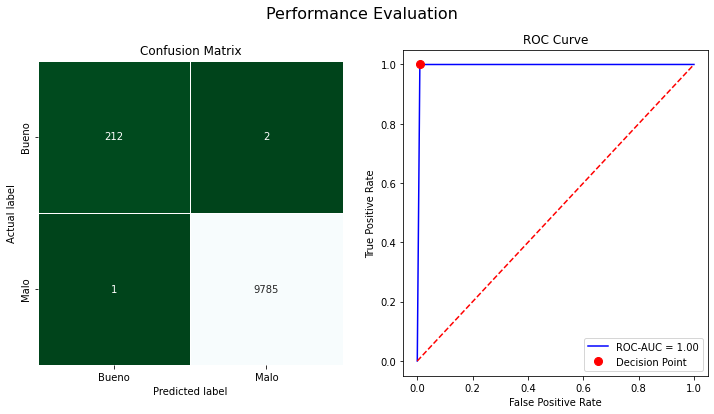

In [58]:
LABELS = ['Bueno', 'Malo']
tree_perf = performance_evaluation_report(tree_pipeline, X_test,y_test, labels=LABELS,show_plot=True)

En lo anterior como se vio en clase aplicamos el tratamiento de los missings como un paso en el pipline, otras opciones que tambien se vieron son:

1.- Reescalamiento o estandarización de variables, esto es porque normalmente las variables no están en la misma escala, esto puede introducir sesgo en el modelo. Por ejemplo, para los modelos de regresión o K-vecinos, se recomienda considerar este paso. En general, los métodos basados en árboles de clasificación no requieren considerar el escalamiento. En scikit - learn algunas opciones populares son: StandardScaler y MinMaxScaler.

2.- Discretización de varibles continuas (esto lo hicimos en nuestra regresión logística, por qué no hicimos lo de la escala en la regresión?).

3.- Transformación eliminado Outliers: Durante el análisis exploratorio de Datos (que por cierto en nuestro ejemplo no hemos realizado alguno, lo pasamos por el arco del triunfo), se pueden detectar algunas inconsistencia de los datos o simplemente, hay un dato atípico, imagínense tener en la base de ingresos a Laura, mientras en la UNAM nos pagan dos pesos, a la laura 1 millón. Este tipo de cuestiones, pueden sesgar el modelo y entonces debemos tratarlos de alguna manera, es lo que se recomienda.

En lo que sigue, eliminaremos los outiliers de la base de datos para tener un modelo más robusto. Crearemos una función que detecte y modifique los valores atípicos.

In [59]:
from sklearn.base import BaseEstimator, TransformerMixin

In [60]:
class OutlierRemover(BaseEstimator, TransformerMixin):
    def __init__(self, n_std=3):
        self.n_std = n_std
    
    def fit(self, X, y = None):
        if np.isnan(X).any(axis=None):
            raise ValueError('''There are missing values in the array! 
                                Please remove them.''')

        mean_vec = np.mean(X, axis=0)
        std_vec = np.std(X, axis=0)
        
        self.upper_band_ = mean_vec + self.n_std * std_vec
        self.lower_band_ = mean_vec - self.n_std * std_vec
        self.n_features_ = len(self.upper_band_)
        
        return self 
    
    def transform(self, X, y = None):
        X_copy = pd.DataFrame(X.copy())
        
        upper_band = np.repeat(
            self.upper_band_.reshape(self.n_features_, -1), 
            len(X_copy), 
            axis=1).transpose()
        lower_band = np.repeat(
            self.lower_band_.reshape(self.n_features_, -1), 
            len(X_copy), 
            axis=1).transpose()
        
        X_copy[X_copy >= upper_band] = upper_band
        X_copy[X_copy <= lower_band] = lower_band
        
        return X_copy.values

Complementamos el paso de pipline para las variables numéricas

In [61]:
num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('outliers', OutlierRemover())])

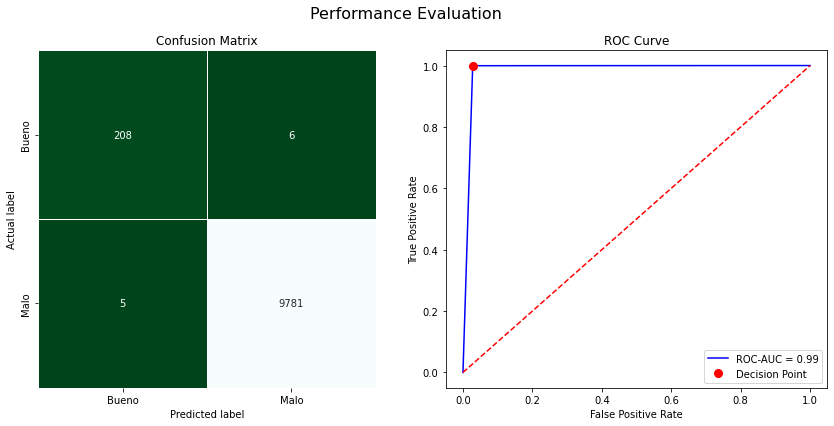

In [62]:
preprocessor = ColumnTransformer(transformers=[('numerical', num_pipeline, num_features),
                                               ('categorical', cat_pipeline, cat_features)],
                                 remainder='drop')

dec_tree = DecisionTreeClassifier(random_state=42)

tree_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('classifier', dec_tree)])

tree_pipeline.fit(X_train, y_train)

tree_perf = performance_evaluation_report(tree_pipeline, X_test, 
                                          y_test, labels=LABELS, 
                                          show_plot=True)

plt.tight_layout()
# plt.savefig('images/ch8_im18.png')
plt.show()

Esta gráfica nos permite decir que nuestro modelo es preciso por como se comporta la curva, ahora utilizaremos Cross-Validation para ajustar los hiperparámetros del arbol tal y como lo hizo el profesor en alguna clase.

In [63]:
from sklearn.model_selection import (GridSearchCV, cross_val_score,
                                                 RandomizedSearchCV,
                                                 cross_validate,
                                                 StratifiedKFold)


In [64]:
k_fold = StratifiedKFold(5, shuffle=True, random_state=42)

In [65]:
cross_val_score(tree_pipeline, X_train, y_train, cv=k_fold)

array([0.999375, 0.9995  , 0.99925 , 0.998875, 0.999   ])

In [66]:
cross_validate(tree_pipeline, X_train, y_train, cv=k_fold,
                           scoring=['accuracy', 'precision', 'recall','roc_auc'])

{'fit_time': array([0.07543254, 0.07448602, 0.06840682, 0.07265162, 0.06929612]),
 'score_time': array([0.02143097, 0.01841927, 0.01970005, 0.01921678, 0.0191052 ]),
 'test_accuracy': array([0.999375, 0.9995  , 0.99925 , 0.998875, 0.999   ]),
 'test_precision': array([0.99987224, 0.99974454, 0.99948921, 0.99923391, 0.99987217]),
 'test_recall': array([0.99948914, 0.99974454, 0.99974454, 0.99961681, 0.99910589]),
 'test_roc_auc': array([0.9968034 , 0.99402432, 0.98817636, 0.98226455, 0.99662897])}

In [67]:
param_grid = {'classifier__criterion': ['entropy', 'gini'],
               'classifier__max_depth': range(3, 11),
               'classifier__min_samples_leaf': range(2, 11)}


In [68]:
classifier_gs = GridSearchCV(tree_pipeline, param_grid,scoring='recall',cv=k_fold, n_jobs=-1, verbose=1)
classifier_gs.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('outliers',
                                                                                          OutlierRemover())]),
                                                                         ['Unnamed: '
                                                                          '0',
                                                                          'num_caso',
                                                                          'edad_credit',
   

In [69]:
print(f'Best parameters: {classifier_gs.best_params_}') 
print(f'Recall (Training set): {classifier_gs.best_score_:.4f}') 
print(f'Recall (Test set): {metrics.recall_score(y_test, classifier_gs.predict(X_test)):.4f}')

Best parameters: {'classifier__criterion': 'gini', 'classifier__max_depth': 6, 'classifier__min_samples_leaf': 5}
Recall (Training set): 0.9998
Recall (Test set): 0.9997


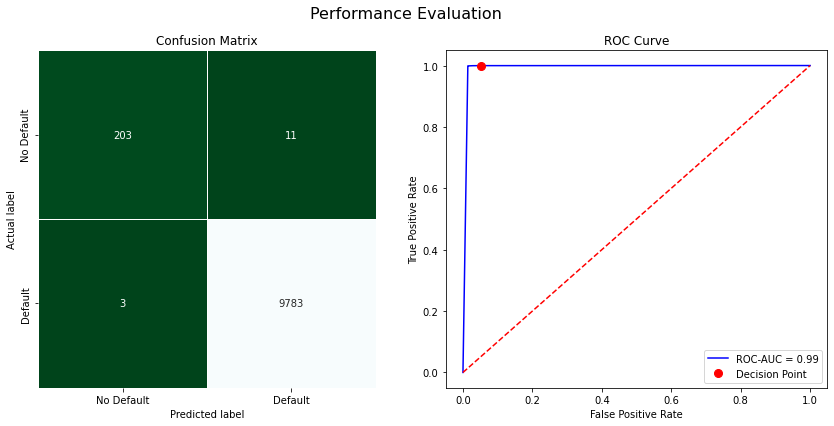

In [70]:
LABELS = ['No Default', 'Default']
tree_gs_perf = performance_evaluation_report(classifier_gs, X_test, 
                                             y_test, labels=LABELS, 
                                             show_plot=True)

plt.tight_layout()
#plt.savefig('images/ch8_im20.png')
plt.show()

In [71]:
from sklearn.metrics import roc_auc_score, roc_curve, mean_squared_error, precision_recall_curve,  accuracy_score

Ahora lo que se hace es comprobar manualmente si en raelidad la aproximación es la óptima 

In [72]:
train_scores, val_scores, leaves = {}, {}, {}
for max_depth in range(1, 26):
    print(max_depth, end=' ', flush=True)
    reg_tree = DecisionTreeClassifier(criterion='gini',
                                          max_depth=max_depth,
                                          min_samples_leaf=10,
                                          random_state=42)
    tree_pipeline = Pipeline(steps=[('preprocessor', preprocessor),('classifier', reg_tree)])
    train_scores[max_depth], val_scores[max_depth], leaves[max_depth] = [],[], []
    for train_idx, test_idx in k_fold.split(X_train,y_train):
        X_t, y_t,  = X_train.iloc[train_idx], y_train.iloc[train_idx]
        X_te, y_te = X_train.iloc[test_idx], y_train.iloc[test_idx]
        tree_pipeline.fit(X_t, y_t)
        train_pred = tree_pipeline.predict_proba(X=X_t)[:, 1]
        train_score = roc_auc_score(y_score=train_pred, y_true=y_t)
        #print(train_score)
        train_scores[max_depth].append(train_score)

        test_pred = tree_pipeline.predict_proba(X=X_te)[:, 1]
        val_score = roc_auc_score(y_score=test_pred, y_true=y_te)
        val_scores[max_depth].append(val_score)  
        #print(val_score)
        leaves[max_depth].append(max_depth)
        #reg_tree.fit(X=X_t, y=y_t)

        
        #train_scores[max_depth].append(train_score)

        #test_pred = reg_tree.predict(X=X_test)
        #val_score = np.sqrt(mean_squared_error(
        #    y_pred=test_pred, y_true=y_test))
        #val_scores[max_depth].append(val_score)
        #leaves[max_depth].append(get_leaves_count(reg_tree))

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 

In [73]:
clf_train_scores = pd.DataFrame(train_scores)
clf_valid_scores = pd.DataFrame(val_scores)
bd_leaves = pd.DataFrame(leaves)
clf_train_scores

,1,2,3,4,5,6,7,8,9,10,...,16,17,18,19,20,21,22,23,24,25
0,0.767668,0.988720,0.997945,0.999675,0.999959,0.999981,0.999985,0.999985,0.999985,0.999985,...,0.999985,0.999985,0.999985,0.999985,0.999985,0.999985,0.999985,0.999985,0.999985,0.999985
1,0.774586,0.990908,0.997267,0.999024,0.999922,0.999976,0.999979,0.999979,0.999979,0.999979,...,0.999979,0.999979,0.999979,0.999979,0.999979,0.999979,0.999979,0.999979,0.999979,0.999979
2,0.773122,0.990930,0.997916,0.999702,0.999941,0.999979,0.999982,0.999982,0.999982,0.999982,...,0.999982,0.999982,0.999982,0.999982,0.999982,0.999982,0.999982,0.999982,0.999982,0.999982
3,0.766517,0.989317,0.998621,0.999698,0.999901,0.999948,0.999965,0.999975,0.999977,0.999977,...,0.999977,0.999977,0.999977,0.999977,0.999977,0.999977,0.999977,0.999977,0.999977,0.999977
4,0.764385,0.989323,0.997827,0.999688,0.999914,0.999960,0.999971,0.999976,0.999976,0.999976,...,0.999976,0.999976,0.999976,0.999976,0.999976,0.999976,0.999976,0.999976,0.999976,0.999976


In [74]:
leaves

{1: [1, 1, 1, 1, 1],
 2: [2, 2, 2, 2, 2],
 3: [3, 3, 3, 3, 3],
 4: [4, 4, 4, 4, 4],
 5: [5, 5, 5, 5, 5],
 6: [6, 6, 6, 6, 6],
 7: [7, 7, 7, 7, 7],
 8: [8, 8, 8, 8, 8],
 9: [9, 9, 9, 9, 9],
 10: [10, 10, 10, 10, 10],
 11: [11, 11, 11, 11, 11],
 12: [12, 12, 12, 12, 12],
 13: [13, 13, 13, 13, 13],
 14: [14, 14, 14, 14, 14],
 15: [15, 15, 15, 15, 15],
 16: [16, 16, 16, 16, 16],
 17: [17, 17, 17, 17, 17],
 18: [18, 18, 18, 18, 18],
 19: [19, 19, 19, 19, 19],
 20: [20, 20, 20, 20, 20],
 21: [21, 21, 21, 21, 21],
 22: [22, 22, 22, 22, 22],
 23: [23, 23, 23, 23, 23],
 24: [24, 24, 24, 24, 24],
 25: [25, 25, 25, 25, 25]}

In [75]:
clf_train_scores

,1,2,3,4,5,6,7,8,9,10,...,16,17,18,19,20,21,22,23,24,25
0,0.767668,0.988720,0.997945,0.999675,0.999959,0.999981,0.999985,0.999985,0.999985,0.999985,...,0.999985,0.999985,0.999985,0.999985,0.999985,0.999985,0.999985,0.999985,0.999985,0.999985
1,0.774586,0.990908,0.997267,0.999024,0.999922,0.999976,0.999979,0.999979,0.999979,0.999979,...,0.999979,0.999979,0.999979,0.999979,0.999979,0.999979,0.999979,0.999979,0.999979,0.999979
2,0.773122,0.990930,0.997916,0.999702,0.999941,0.999979,0.999982,0.999982,0.999982,0.999982,...,0.999982,0.999982,0.999982,0.999982,0.999982,0.999982,0.999982,0.999982,0.999982,0.999982
3,0.766517,0.989317,0.998621,0.999698,0.999901,0.999948,0.999965,0.999975,0.999977,0.999977,...,0.999977,0.999977,0.999977,0.999977,0.999977,0.999977,0.999977,0.999977,0.999977,0.999977
4,0.764385,0.989323,0.997827,0.999688,0.999914,0.999960,0.999971,0.999976,0.999976,0.999976,...,0.999976,0.999976,0.999976,0.999976,0.999976,0.999976,0.999976,0.999976,0.999976,0.999976


In [76]:
clf_valid_scores

,1,2,3,4,5,6,7,8,9,10,...,16,17,18,19,20,21,22,23,24,25
0,0.775640,0.993838,0.999294,0.999615,0.999855,0.996952,0.996971,0.996971,0.996971,0.996971,...,0.996971,0.996971,0.996971,0.996971,0.996971,0.996971,0.996971,0.996971,0.996971,0.996971
1,0.747963,0.985106,0.987962,0.996859,0.993941,0.994130,0.994132,0.994132,0.994132,0.994132,...,0.994132,0.994132,0.994132,0.994132,0.994132,0.994132,0.994132,0.994132,0.994132,0.994132
2,0.753811,0.984992,0.999402,0.999631,0.997048,0.997065,0.997060,0.997060,0.997060,0.997060,...,0.997060,0.997060,0.997060,0.997060,0.997060,0.997060,0.997060,0.997060,0.997060,0.997060
3,0.780191,0.993045,0.996202,0.993808,0.994061,0.994124,0.994131,0.994118,0.994120,0.994120,...,0.994120,0.994120,0.994120,0.994120,0.994120,0.994120,0.994120,0.994120,0.994120,0.994120
4,0.788707,0.993047,0.999393,0.999618,0.999853,0.999897,0.999914,0.999916,0.999916,0.999916,...,0.999916,0.999916,0.999916,0.999916,0.999916,0.999916,0.999916,0.999916,0.999916,0.999916


In [77]:
roc_entrenamiento=[]
for c in clf_train_scores.columns:
    promedio_roc=mean(clf_train_scores[c])
    roc_entrenamiento.append(promedio_roc)
    
roc_validacion=[]
for c in clf_valid_scores.columns:
    promedio_roc=mean(clf_valid_scores[c])
    roc_validacion.append(promedio_roc)

prof=[]
for c in bd_leaves.columns:
    id_=mean(bd_leaves[c])
    prof.append(id_)

In [78]:
roc_entrenamiento

[0.7692553936554669,
 0.9898395155248133,
 0.9979152673431667,
 0.9995576050462962,
 0.9999274434349597,
 0.9999687564677995,
 0.9999761703275405,
 0.9999793027039656,
 0.9999796206167968,
 0.9999796206167968,
 0.9999796206167968,
 0.9999796206167968,
 0.9999796206167968,
 0.9999796206167968,
 0.9999796206167968,
 0.9999796206167968,
 0.9999796206167968,
 0.9999796206167968,
 0.9999796206167968,
 0.9999796206167968,
 0.9999796206167968,
 0.9999796206167968,
 0.9999796206167968,
 0.9999796206167968,
 0.9999796206167968]

In [79]:
roc_validacion

[0.7692625977026959,
 0.9900055654132869,
 0.996450831586932,
 0.9979063526757939,
 0.9969516384019238,
 0.9964335109755236,
 0.9964416743338569,
 0.9964393587565201,
 0.9964397322367358,
 0.9964397322367358,
 0.9964397322367358,
 0.9964397322367358,
 0.9964397322367358,
 0.9964397322367358,
 0.9964397322367358,
 0.9964397322367358,
 0.9964397322367358,
 0.9964397322367358,
 0.9964397322367358,
 0.9964397322367358,
 0.9964397322367358,
 0.9964397322367358,
 0.9964397322367358,
 0.9964397322367358,
 0.9964397322367358]

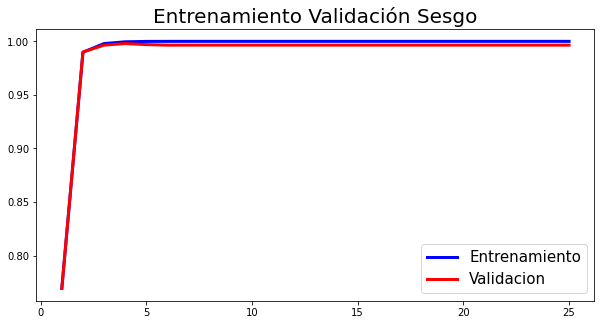

In [80]:
fig, ax = plt.subplots(figsize=(10,5))

ax.set_title("Entrenamiento Validación Sesgo",fontsize=20)
ax.plot(prof,roc_entrenamiento,color="blue",linewidth=3,label="Entrenamiento")
ax.plot(prof,roc_validacion,color="red",linewidth=3,label="Validacion")
#gca().yaxis.set_major_formatter("{x:,.0%}")
#xticks(fontsize=16)
#yticks(fontsize=16)
#axvline(4)
legend(fontsize=15)
show()

La gráfica nos dice que el modelo tiene pocas variaciones con respecto al que se programo sin utilizar metodos manuales o bien el que arroja Pyhton, entonces podemos creer en nuestro primer resultado 

In [81]:
clasificador=classifier_gs.best_params_['classifier__criterion']
profundidad=classifier_gs.best_params_['classifier__max_depth']
minimoDeHojas=classifier_gs.best_params_['classifier__min_samples_leaf']

In [82]:
reg_tree = DecisionTreeClassifier(criterion=clasificador,
                                          max_depth=profundidad,
                                          min_samples_leaf=minimoDeHojas,
                                          random_state=42)
tree_pipeline = Pipeline(steps=[('preprocessor', preprocessor),('classifier', reg_tree)])

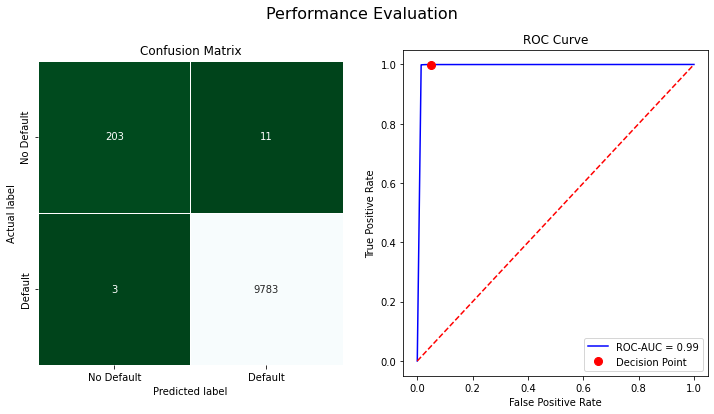

In [83]:
tree_pipeline.fit(X_train, y_train)

tree_perf = performance_evaluation_report(tree_pipeline, X_test, 
                                          y_test, labels=LABELS, 
                                          show_plot=True)

# Cross Validation 

Primero haremos el Cross-Validation en el arbol 

In [84]:
reg_tree = DecisionTreeClassifier(criterion=clasificador,
                                          max_depth=profundidad,
                                          min_samples_leaf=minimoDeHojas,
                                          random_state=42)
tree_pipeline = Pipeline(steps=[('preprocessor', preprocessor),('classifier', reg_tree)])

In [85]:
k_fold_tree_1 = StratifiedKFold(50, shuffle=True, random_state=42)

In [86]:
score_tree_1 = cross_val_score(tree_pipeline, X_train, y_train, cv=k_fold_tree_1)
score_tree_1

array([0.99875, 1.     , 1.     , 1.     , 0.9975 , 0.99875, 0.99875,
       1.     , 1.     , 0.99875, 1.     , 1.     , 0.99625, 1.     ,
       0.99625, 1.     , 1.     , 0.99875, 0.99875, 1.     , 0.99625,
       1.     , 0.99875, 0.99875, 0.99875, 1.     , 1.     , 0.99625,
       1.     , 0.9975 , 1.     , 0.9975 , 0.99875, 1.     , 1.     ,
       0.9975 , 0.99875, 0.99875, 1.     , 1.     , 0.99875, 1.     ,
       0.99875, 1.     , 0.99875, 1.     , 1.     , 1.     , 0.99875,
       0.99875])

In [87]:
score_tree_1.mean()

0.9990749999999999

In [88]:
k_fold_tree_2 = StratifiedKFold(100, shuffle=True, random_state=42)

In [89]:
score_tree_2 = cross_val_score(tree_pipeline, X_train, y_train, cv=k_fold_tree_2)
score_tree_2

array([0.9975, 1.    , 1.    , 1.    , 1.    , 1.    , 1.    , 1.    ,
       0.9975, 0.9975, 0.9975, 1.    , 1.    , 0.9975, 1.    , 1.    ,
       1.    , 1.    , 1.    , 1.    , 0.9975, 1.    , 1.    , 1.    ,
       0.9975, 0.9975, 0.9975, 0.9975, 1.    , 0.9975, 0.995 , 1.    ,
       1.    , 1.    , 1.    , 0.9975, 1.    , 0.9975, 0.9975, 1.    ,
       1.    , 0.9975, 1.    , 0.9975, 0.9975, 1.    , 1.    , 1.    ,
       1.    , 1.    , 0.995 , 1.    , 1.    , 1.    , 1.    , 1.    ,
       0.9975, 0.995 , 0.9975, 1.    , 1.    , 1.    , 1.    , 1.    ,
       0.995 , 1.    , 0.9975, 1.    , 1.    , 1.    , 1.    , 0.9975,
       0.9975, 0.9975, 1.    , 0.9975, 1.    , 1.    , 1.    , 1.    ,
       1.    , 1.    , 0.9975, 1.    , 1.    , 0.9975, 1.    , 1.    ,
       0.9975, 1.    , 1.    , 1.    , 1.    , 1.    , 1.    , 1.    ,
       0.9975, 1.    , 1.    , 0.9975])

In [90]:
score_tree_2.mean()

0.9990750000000002

Con 50 y 100 K-Fold's los resultados del arbol de desición con respecto al accuracy parecen muy prometedores ahora veamos lo mismo pero con la regresión

In [91]:
validation_regression = LogisticRegression()

In [92]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     50000 non-null  int64  
 1   num_caso       50000 non-null  int64  
 2   edad_credit    50000 non-null  float64
 3   retrasos_max   50000 non-null  float64
 4   comp_interno1  50000 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 1.9 MB


In [93]:
k_fold_reg_1 = StratifiedKFold(50, shuffle=True, random_state=42)

In [94]:
score_reg_1 = cross_val_score(validation_regression, X_train, y_train, cv=k_fold_reg_1)
score_reg_1

C:\Users\cresp\anaconda3\envs\jupyter 2.0\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\cresp\anaconda3\envs\jupyter 2.0\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

C:\Users\cresp\anaconda3\envs\jupyter 2.0\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\cresp\anaconda3\envs\jupyter 2.0\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

array([0.995  , 0.9975 , 0.995  , 0.99375, 0.99625, 0.99875, 0.99625,
       0.99875, 0.995  , 0.995  , 0.995  , 0.9975 , 0.99625, 0.99625,
       0.995  , 0.995  , 0.99875, 0.995  , 0.99875, 0.99625, 0.9975 ,
       0.9975 , 0.99875, 0.99875, 0.9975 , 0.99375, 0.99375, 0.99625,
       0.9975 , 0.99625, 0.99875, 0.99625, 0.9925 , 0.9975 , 0.99875,
       0.99875, 0.995  , 0.99625, 0.99875, 0.99625, 0.9975 , 0.995  ,
       0.99375, 0.99625, 0.99625, 0.985  , 0.99625, 0.995  , 0.995  ,
       0.99375])

In [95]:
score_reg_1.mean()

0.9960999999999999

In [96]:
k_fold_reg_2 = StratifiedKFold(100, shuffle=True, random_state=42)

In [97]:
score_reg_2 = cross_val_score(validation_regression, X_train, y_train, cv=k_fold_reg_2)
score_reg_2

C:\Users\cresp\anaconda3\envs\jupyter 2.0\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\cresp\anaconda3\envs\jupyter 2.0\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

C:\Users\cresp\anaconda3\envs\jupyter 2.0\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\cresp\anaconda3\envs\jupyter 2.0\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

C:\Users\cresp\anaconda3\envs\jupyter 2.0\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\cresp\anaconda3\envs\jupyter 2.0\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

array([0.995 , 0.995 , 0.9975, 0.9975, 0.9975, 0.9925, 0.9975, 0.995 ,
       0.9975, 0.995 , 1.    , 0.9975, 0.995 , 0.9975, 0.995 , 0.9975,
       0.9975, 0.9975, 0.9925, 0.9975, 0.995 , 0.9975, 0.995 , 1.    ,
       0.9975, 0.9975, 0.995 , 1.    , 0.9975, 0.9925, 0.9975, 0.995 ,
       0.995 , 0.9975, 0.9975, 0.9975, 0.9975, 0.9925, 0.9975, 0.9975,
       0.9975, 0.995 , 1.    , 1.    , 1.    , 0.9975, 0.9975, 0.9975,
       0.9975, 0.9975, 0.9975, 0.995 , 0.995 , 0.995 , 0.99  , 0.9975,
       0.99  , 0.995 , 0.9925, 1.    , 0.9975, 0.9975, 0.9925, 1.    ,
       0.9975, 0.99  , 0.995 , 0.9975, 0.9975, 1.    , 1.    , 0.9975,
       0.995 , 0.9975, 0.995 , 0.9975, 0.995 , 1.    , 1.    , 0.995 ,
       0.995 , 0.9975, 0.995 , 0.995 , 0.9975, 0.99  , 0.99  , 1.    ,
       0.9925, 1.    , 0.9975, 0.9975, 1.    , 0.9925, 0.9925, 0.9975,
       0.99  , 1.    , 0.9975, 0.9975])

In [98]:
score_reg_2.mean()

0.9964

Los dos modelos como se pude apreciar son bastante buenos pero en cuanto a puntaje el modelo del Árbol de Desición gana, ya que para 50 y 100 folds este supera en ambos a la Regresión Logística. Por lo que elegimos al Árbol de Disicón como el mejor modelo de ambos.

# Puntos óptimos de desición para el modelo 

Para enontrar los puntos óptimos se busco una función que nos hace esto

https://stackoverflow.com/questions/28719067/roc-curve-and-cut-off-point-python

pero básicamente resume los métodos se sklearn y stats model 

In [99]:
def Find_Optimal_Cutoff(target, predicted):
    """ Find the optimal probability cutoff point for a classification model related to event rate
    Parameters
    ----------
    target : Matrix with dependent or target data, where rows are observations

    predicted : Matrix with predicted data, where rows are observations

    Returns
    -------     
    list type, with optimal cutoff value
        
    """
    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_t['threshold']) 

In [104]:
y_predict = dec_tree.predict(X_train)

fpr, tpr, threshold = metrics.roc_curve(y_train, y_predict)

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = threshold[optimal_idx]

optimal_threshold

C:\Users\cresp\anaconda3\envs\jupyter 2.0\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


1.0

In [105]:
optimal_value = Find_Optimal_Cutoff(y_train, y_predict) 
optimal_value

[1.0]